# Data Cleaning Step

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
import pycountry
import pycountry_convert as pc
from pycountry_convert import country_name_to_country_alpha2
from pycountry_convert import country_alpha2_to_continent_code

In [3]:
## Pulling data from csvs and storing as dataframes and Cleaning our dataframes

pharm_csv = os.path.join(os.getcwd(), "Data", "pharmacists.csv")
pharm_df = pd.read_csv(pharm_csv)
##Changing column names
pharm_df = pharm_df.rename(columns = {"First Tooltip" : "Pharmicists Per 10,000"}).drop(columns =["Indicator"])



med_doctors_csv = os.path.join(os.getcwd(), "Data", "medicalDoctors.csv")
med_doctors_df = pd.read_csv(med_doctors_csv)
##Changing column names
med_doctors_df = med_doctors_df.rename(columns = {"First Tooltip" : "Medical Doctors Per 10,000"}).drop(columns =["Indicator"])



life_expect_csv = os.path.join(os.getcwd(), "Data", "lifeExpectancy_world.csv")
life_expect_df = pd.read_csv(life_expect_csv)
##Changing column names
life_expect_df = life_expect_df.drop(columns = {"Code"})
life_expect_df = life_expect_df.rename(columns = {'Entity' : 'Location'})
life_expect_df = life_expect_df.melt(['Location'], var_name = 'Period', value_name = 'Life Expectancy')
life_expect_df['Period'] = life_expect_df['Period'].astype(int)
life_expect_df = life_expect_df.rename(columns = {"Entity" : "Location",
                                                 "Year" : "Period"
                                                 })


hand_wash_csv = os.path.join(os.getcwd(), "Data", "basicHandWashing.csv")
hand_wash_df = pd.read_csv(hand_wash_csv)
##Changing column names
hand_wash_df = hand_wash_df.rename(columns = {"First Tooltip" : "Population with basic handwashing facilities at home (%)"}).drop(columns =["Indicator"])
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Urban")==False]
hand_wash_df = hand_wash_df[hand_wash_df["Dim1"].str.contains("Rural")==False]
hand_wash_df = hand_wash_df.drop(columns = {"Dim1"})



drink_water_csv = os.path.join(os.getcwd(), "Data", "basicDrinkingWaterServices.csv")
drink_water_df = pd.read_csv(drink_water_csv)
##Changing column names
drink_water_df = drink_water_df.rename(columns = {"First Tooltip" : "Population using at least basic drinking-water services (%)"}).drop(columns =["Indicator"])



sanitize_csv= os.path.join(os.getcwd(), "Data", "atLeastBasicSanitizationServices.csv")
sanitize_df = pd.read_csv(sanitize_csv)
##Changing column names
sanitize_df = sanitize_df.rename(columns = {"First Tooltip" : "Population using at least basic sanitization services (%)"}).drop(columns =["Indicator"])
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Urban")==False]
sanitize_df = sanitize_df[sanitize_df["Dim1"].str.contains("Rural")==False]
sanitize_df = sanitize_df.drop(columns = {"Dim1"})



In [4]:
sanitize_df

,Location,Period,Population using at least basic sanitization services (%)
0,Afghanistan,2017,43.42
3,Afghanistan,2016,42.05
6,Afghanistan,2015,40.71
9,Afghanistan,2014,39.37
12,Afghanistan,2013,38.06
...,...,...,...
9353,Zimbabwe,2004,45.37
9356,Zimbabwe,2003,46.11
9359,Zimbabwe,2002,46.15
9362,Zimbabwe,2001,46.05


### Merge tha Data

In [5]:
merge_df1 = pd.merge(pharm_df, med_doctors_df, on = ["Location", "Period"], how = "outer")
merge_df1

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000"
0,Afghanistan,2016,0.47,2.78
1,Afghanistan,2015,0.50,2.85
2,Afghanistan,2014,0.51,2.98
3,Afghanistan,2012,0.27,2.41
4,Afghanistan,2011,0.28,2.52
...,...,...,...,...
2620,Zimbabwe,2011,NaN,0.82
2621,Zimbabwe,2008,NaN,0.60
2622,Zimbabwe,2007,NaN,0.54
2623,Zimbabwe,2005,NaN,1.26


In [6]:
merge_df2 = pd.merge(merge_df1, life_expect_df, on = ["Location", "Period"], how = "outer")
merge_df2

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy
0,Afghanistan,2016,0.47,2.78,63.763
1,Afghanistan,2015,0.50,2.85,63.377
2,Afghanistan,2014,0.51,2.98,62.966
3,Afghanistan,2012,0.27,2.41,62.054
4,Afghanistan,2011,0.28,2.52,61.553
...,...,...,...,...,...
17253,Western Sahara,2019,NaN,NaN,70.263
17254,World,2019,NaN,NaN,72.584
17255,Yemen,2019,NaN,NaN,66.125
17256,Zambia,2019,NaN,NaN,63.886


In [7]:
merge_df3 = pd.merge(merge_df2, hand_wash_df, on = ["Location", "Period"], how = "outer")
merge_df4 = pd.merge(merge_df3, drink_water_df, on = ["Location", "Period"], how = "outer")
final_merge_df = pd.merge(merge_df4, sanitize_df, on = ["Location", "Period"], how = "outer")
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
17421,Viet Nam,2004,NaN,NaN,NaN,NaN,79.45,59.79
17422,Viet Nam,2003,NaN,NaN,NaN,NaN,78.47,57.95
17423,Viet Nam,2000,NaN,NaN,NaN,NaN,75.54,52.37
17424,Republic of Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


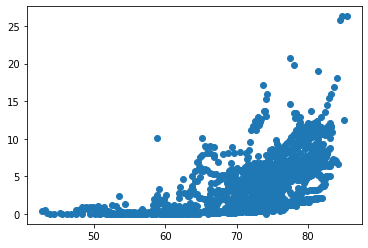

In [8]:
## Scatterplot of Life Expectancy vs Pharmicists per 10,000
plt.scatter(final_merge_df["Life Expectancy"], final_merge_df["Pharmicists Per 10,000"])

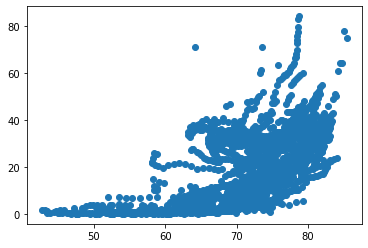

In [9]:
## Scatterplot of Life Expectancy vs Medical Doctors per 10,000
plt.scatter(final_merge_df["Life Expectancy"], final_merge_df["Medical Doctors Per 10,000"])

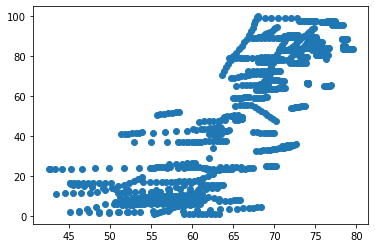

In [10]:
## Scatterplot of Life Expectancy vs Population with basic handwashing facilities at home
plt.scatter(final_merge_df["Life Expectancy"], final_merge_df["Population with basic handwashing facilities at home (%)"])

In [11]:
## Count the number of data points for Population with basic handwashing facilities at home
final_merge_df["Population with basic handwashing facilities at home (%)"].count()

921

In [12]:
##Test dataframe for individual country (Canada)
can_df = final_merge_df.loc[final_merge_df["Location"] == "Canada"]
can_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
336,Canada,2016,11.24,23.11,82.117,NaN,98.83,99.32
2664,Canada,1950,NaN,NaN,68.494,NaN,NaN,NaN
2907,Canada,1951,NaN,NaN,68.638,NaN,NaN,NaN
3150,Canada,1952,NaN,NaN,68.922,NaN,NaN,NaN
3393,Canada,1953,NaN,NaN,69.197,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
16282,Canada,2014,NaN,NaN,81.927,NaN,98.72,99.40
16427,Canada,2015,NaN,NaN,82.026,NaN,98.77,99.36
16707,Canada,2017,NaN,NaN,82.210,NaN,98.88,99.29
16864,Canada,2018,NaN,NaN,82.315,NaN,NaN,NaN


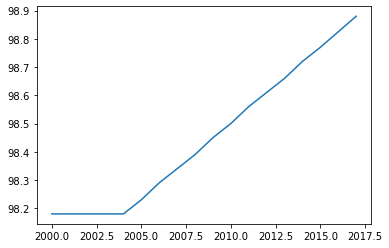

In [13]:
plt.plot(can_df["Period"], can_df["Population using at least basic drinking-water services (%)"])

In [14]:
final_merge_df["Location"].nunique()

264

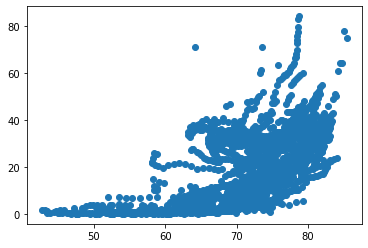

In [15]:
plt.scatter(final_merge_df["Life Expectancy"], final_merge_df["Medical Doctors Per 10,000"])

In [16]:
## Clean data frame of countries with invalid location names for conversion
for index, row in final_merge_df.iterrows():
    country = row['Location']
    if country == "Bolivia (Plurinational State of)":
        change_country = "Bolivia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Côte d’Ivoire":
        change_country = "Ivory Coast"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Iran (Islamic Republic of)":
        change_country = "Iran"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Republic of Korea":
        change_country = "South Korea"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Sudan (until 2011)":
        change_country = "Sudan"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Timor-Leste":
        change_country = "East Timor"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Micronesia (Federated States of)":
        change_country = "Micronesia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "The former Yugoslav Republic of Macedonia":
        change_country = "North Macedonia"
        final_merge_df.loc[ index, "Location"] = change_country
    if country == "Venezuela (Bolivarian Republic of)":
        change_country = "Venezuela"
        final_merge_df.loc[ index, "Location"] = change_country

In [17]:
final_merge_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%)
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46
...,...,...,...,...,...,...,...,...
17421,Viet Nam,2004,NaN,NaN,NaN,NaN,79.45,59.79
17422,Viet Nam,2003,NaN,NaN,NaN,NaN,78.47,57.95
17423,Viet Nam,2000,NaN,NaN,NaN,NaN,75.54,52.37
17424,South Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00


In [25]:
#Put info into Continent Row based on Location
index_list = []
for index, row in final_merge_df.iterrows():
    # get continent type from df
    country = row['Location']
    try:
        # print(country)
        c_to_a = country_name_to_country_alpha2(country)
        # print(c_to_a)    
        c_to_c = country_alpha2_to_continent_code(c_to_a)   
        final_merge_df.loc[index, 'Continent']= c_to_c
    except KeyError:
        row_to_drop = index
        index_list.append(row_to_drop)
final_df = final_merge_df.drop(index_list)

In [29]:
final_df

,Location,Period,"Pharmicists Per 10,000","Medical Doctors Per 10,000",Life Expectancy,Population with basic handwashing facilities at home (%),Population using at least basic drinking-water services (%),Population using at least basic sanitization services (%),Continent
0,Afghanistan,2016,0.47,2.78,63.763,37.67,54.84,42.05,AS
1,Afghanistan,2015,0.50,2.85,63.377,37.59,52.39,40.71,AS
2,Afghanistan,2014,0.51,2.98,62.966,37.52,49.96,39.37,AS
3,Afghanistan,2012,0.27,2.41,62.054,37.37,45.19,36.75,AS
4,Afghanistan,2011,0.28,2.52,61.553,37.30,42.84,35.46,AS
...,...,...,...,...,...,...,...,...,...
17421,Viet Nam,2004,NaN,NaN,NaN,NaN,79.45,59.79,AS
17422,Viet Nam,2003,NaN,NaN,NaN,NaN,78.47,57.95,AS
17423,Viet Nam,2000,NaN,NaN,NaN,NaN,75.54,52.37,AS
17424,South Korea,2001,NaN,NaN,NaN,NaN,NaN,100.00,AS


In [30]:
final_df.groupby(["Continent"]).describe()

Period                                                          \
            count         mean        std     min     25%     50%     75%   
Continent                                                                   
AF         3793.0  1985.015028  20.294146  1950.0  1967.0  1985.0  2003.0   
AS         3631.0  1985.356100  20.354723  1950.0  1968.0  1986.0  2003.0   
EU         3262.0  1985.158185  20.219786  1950.0  1968.0  1986.0  2003.0   
NA         2609.0  1984.669605  20.238751  1950.0  1967.0  1985.0  2002.0   
OC         1558.0  1984.777279  20.265383  1950.0  1967.0  1985.0  2002.0   
SA         1016.0  1985.350394  20.367444  1950.0  1968.0  1986.0  2003.0   

                  Pharmicists Per 10,000            ...  \
              max                  count      mean  ...   
Continent                                           ...   
AF         2019.0                  302.0  0.794166  ...   
AS         2019.0                  566.0  3.591606  ...   
EU         2019.0                  736.0  6.127568  ...   
NA         2019.0                   57.0  4.004614  ...   
OC         2019.0                   73.0  3.716014  ...   
SA         2019.0                   51.0  2.277647  ...   

          Population using at least basic drinking-water services (%)          \
                                                                  75%     max   
Continent                                                                       
AF                                                   63.3700            99.83   
AS                                                   98.1000           100.00   
EU                                                  100.0000           100.00   
NA                                                   97.0000           100.00   
OC                                                   99.1325           100.00   
SA                                                   89.9175           100.00   

          Population using at least basic sanitization services (%)  \
                                                              count   
Continent                                                             
AF                                                     959.0          
AS                                                     817.0          
EU                                                     743.0          
NA                                                     408.0          
OC                                                     286.0          
SA                                                     210.0          

                                                                          
                mean        std    min      25%     50%      75%     max  
Continent                                                                 
AF         37.448248  26.259016   3.40  16.4700  30.420  50.7850  100.00  
AS         79.967283  22.821293   9.96  64.5500  91.400  98.5200  100.00  
EU         95.806057   5.822670  74.31  95.1150  98.070  99.4500  100.00  
NA         82.005784  15.760934  16.75  77.8175  85.930  91.5800   99.97  
OC         74.315944  28.175722  12.95  54.5025  84.155  97.8575  100.00  
SA         81.096286  13.819935  34.51  75.0175  82.960  92.6500  100.00  

[6 rows x 56 columns]

<AxesSubplot:xlabel='Continent'>

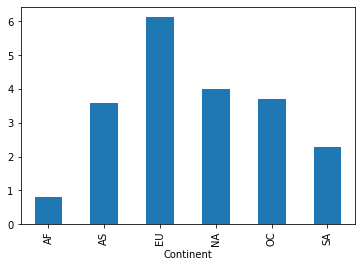

In [49]:
final_df.groupby(["Continent"])["Pharmicists Per 10,000"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Continent'>

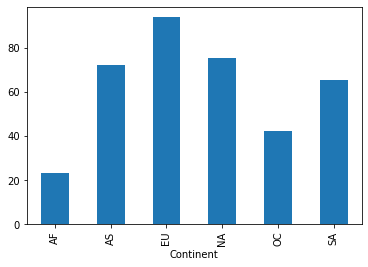

In [50]:
final_df.groupby(["Continent"])["Population with basic handwashing facilities at home (%)"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Continent'>

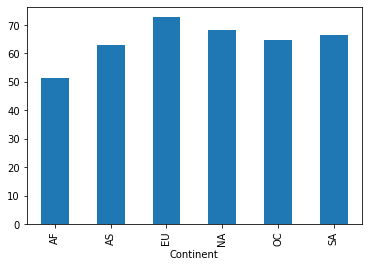

In [43]:
final_df.groupby(["Continent"])["Life Expectancy"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Continent'>

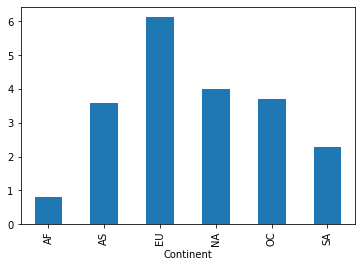

In [44]:
final_df.groupby(["Continent"])["Pharmicists Per 10,000"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Continent'>

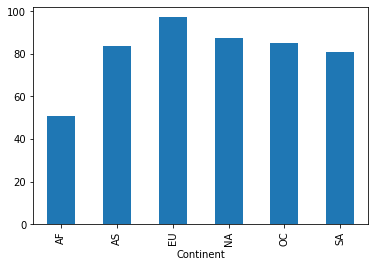

In [48]:
final_df.groupby(["Continent"])["Population using at least basic drinking-water services (%)"].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Continent'>

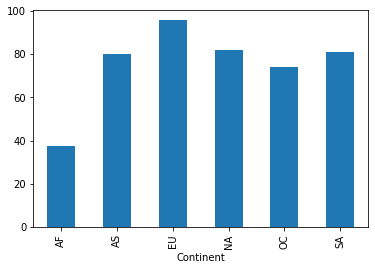

In [51]:
"Population using at least basic sanitization services (%)"
final_df.groupby(["Continent"])["Population using at least basic sanitization services (%)"
].mean().plot(kind = 'bar')